In [2]:
# Import Library
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Baca Dataset
data = pd.read_csv('kc_house_data.csv')
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


#### 1. Untuk feature/column '''Price''' & '''Grade''', hitung dan beri penjelasan (insight) terkait:
- Titik Pusat Data (Central Tendency)
- Persebaran Data (Dispersion)
- Distribusi Data (Distribution)

In [4]:
# Titik Pusat Data
print('Mean:')
print(data['price'].mean())
print(data['grade'].mean())
print('')
print('Median:')
print(data['price'].median())
print(data['grade'].median())
print('')
print('Mode:')
print(data['price'].mode())
print(data['grade'].mode())

Mean:
540296.5735055795
7.657915451220076

Median:
450000.0
7.0

Mode:
0    350000.0
1    450000.0
dtype: float64
0    7
dtype: int64


<function matplotlib.pyplot.show(*args, **kw)>

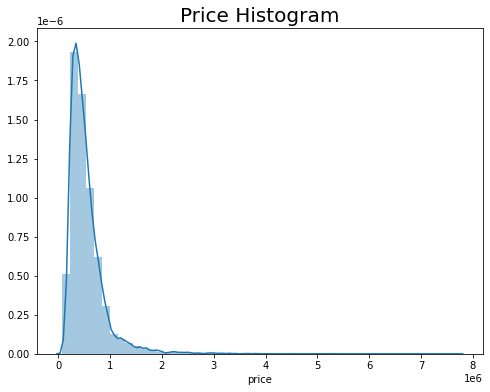

In [5]:
# Distribusi Data
## Price
plt.figure(figsize=(8,6))
sns.distplot(data['price'])
plt.title('Price Histogram',size=20)
plt.show

##### Dikarenakan distribusi data pada kolom 'Price' termasuk kategori right skewed distribution, maka penentuan titik pusat data lebih baik menggunakan median

<function matplotlib.pyplot.show(*args, **kw)>

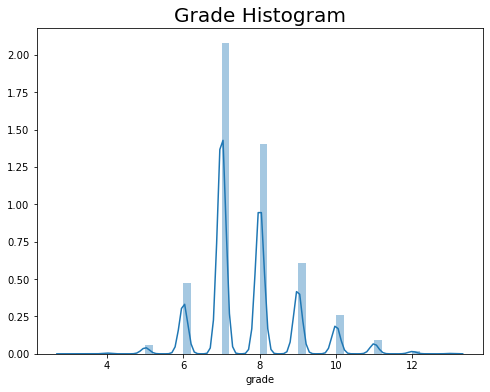

In [6]:
## Grade
plt.figure(figsize=(8,6))
sns.distplot(data['grade'])
plt.title('Grade Histogram',size=20)
plt.show

In [7]:
# Persebaran Data
## Price
print('Price Standar Deviation:', data['price'].std())
print('Price Variance:', data['price'].var())
print('Price Mean Absolute Deviation:', data['price'].mad())

Price Standar Deviation: 367368.1401013936
Price Variance: 134959350361.55716
Price Mean Absolute Deviation: 234028.17572404226


In [8]:
## Grade
print('Grade Standar Deviation:', data['grade'].std())
print('Grade Variance:', data['grade'].var())
print('Grade Mean Absolute Deviation:', data['grade'].mad())

Grade Standar Deviation: 1.1731996637757696
Grade Variance: 1.3763974510835788
Grade Mean Absolute Deviation: 0.9287958624499467


#### 2. Carilah data outlier dan beri penjelasan (insight) pada feature/column sqft_living! Tambahkan plot untuk menampilkan adanya data outlier!

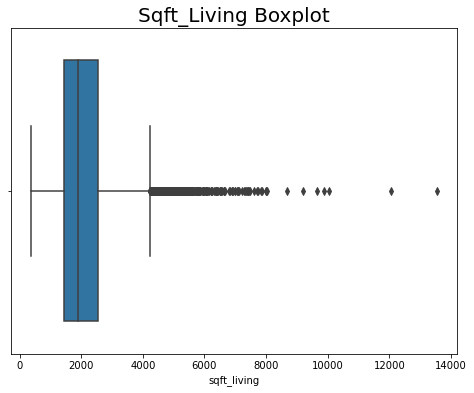

In [10]:
plt.figure(figsize=(8,6))
sns.boxplot(data['sqft_living'])
plt.title('Sqft_Living Boxplot',size=20)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

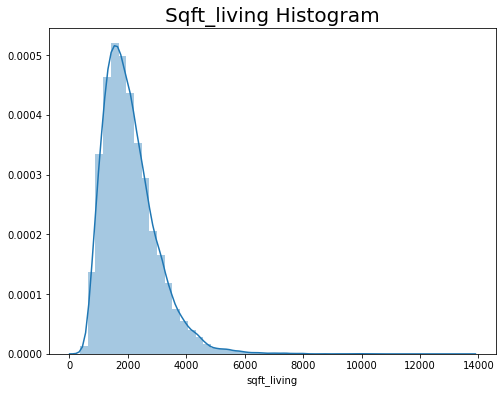

In [12]:
plt.figure(figsize=(8,6))
sns.distplot(data['sqft_living'])
plt.title('Sqft_living Histogram',size=20)
plt.show

In [11]:
q1 = np.quantile(data['sqft_living'],0.25)
q3 = np.quantile(data['sqft_living'],0.75)
iqr = q3-q1
lower = q1-1.5*iqr
upper = q3+1.5*iqr
print (lower)
print (upper)

-250.0
4230.0


In [13]:
data[['id','sqft_living']].loc[(data['sqft_living'] <= lower)| (data['sqft_living'] >= upper)]

,id,sqft_living
5,7237550310,5420
70,1525059190,4770
115,3626039325,4380
153,7855801670,5180
239,5152100060,4410
...,...,...
21535,1561750040,4350
21545,6664500090,4500
21560,9253900271,4850
21574,7430200100,4910


##### Distribusi sqft_living rumah-rumah yang ada pada dataset berada disekitar angka 2000, dan terdapat banyak outliers yang menunjukkan sqft_living rumah diatas 4230.

#### 3. Tampilkan distribusi (sebaran data) dalam bentuk plot yang tepat, untuk feature/column yr_built to make life choices. Jelaskan insight apa yang Anda dapatkan di setiap plot tersebut!

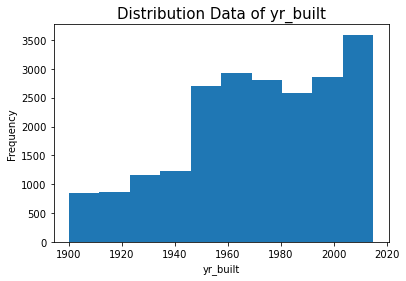

In [14]:
plt.hist(data['yr_built'])
plt.title('Distribution Data of yr_built', size=15)
plt.xlabel('yr_built')
plt.ylabel('Frequency')
plt.show()

In [15]:
print('Median:')
print(data['yr_built'].median())

Median:
1975.0


#### Distribusi data yr_built rumah yang ada pada dataset berada disekitar angka 1975/1980. Berdasarkan grafil distribusi data, semakin tua umur rumah, semakin sedikit orang yang ingin menjual rumahnya.

#### 4. Di antara grade, sqft_lot, & condition, manakah feature/column yang memiliki nilai korelasi tertinggi pada feature/column price? Jelaskan metode korelasi apa yang Anda gunakan, serta apa insight untuk penjual/calon pembeli?

In [19]:
from scipy.stats import pearsonr
list1 = data['grade']
list2 = data['sqft_lot']
list3 = data['condition']
list4 = data['price']

corr1,_= pearsonr(list1, list4)
corr2,_= pearsonr(list2, list4)
corr3,_= pearsonr(list3, list4)
print('Pearson correlation Grade vs Price: %.3f' % corr1)
print('Pearson correlation Sqft_lot vs Price: %.3f' % corr2)
print('Pearson correlation Condition vs Price: %.3f' % corr3)

Pearson correlation Grade vs Price: 0.668
Pearson correlation Sqft_lot vs Price: 0.090
Pearson correlation Condition vs Price: 0.036


In [22]:
data.corr().style.background_gradient().set_precision(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.00,-0.02,0.00,0.01,-0.01,-0.13,0.02,-0.00,0.01,-0.02,0.01,-0.01,-0.01,0.02,-0.02,-0.01,-0.00,0.02,-0.00,-0.14
price,-0.02,1.00,0.31,0.53,0.70,0.09,0.26,0.27,0.40,0.04,0.67,0.61,0.32,0.05,0.13,-0.05,0.31,0.02,0.59,0.08
bedrooms,0.00,0.31,1.00,0.51,0.58,0.03,0.18,-0.01,0.08,0.03,0.36,0.48,0.30,0.16,0.02,-0.15,-0.01,0.13,0.39,0.03
bathrooms,0.01,0.53,0.51,1.00,0.76,0.09,0.50,0.06,0.19,-0.13,0.67,0.69,0.28,0.51,0.05,-0.20,0.02,0.22,0.57,0.09
sqft_living,-0.01,0.70,0.58,0.76,1.00,0.17,0.35,0.10,0.28,-0.06,0.76,0.88,0.44,0.32,0.06,-0.20,0.05,0.24,0.76,0.18
sqft_lot,-0.13,0.09,0.03,0.09,0.17,1.00,-0.00,0.02,0.07,-0.01,0.11,0.18,0.02,0.05,0.01,-0.13,-0.09,0.23,0.14,0.72
floors,0.02,0.26,0.18,0.50,0.35,-0.00,1.00,0.02,0.03,-0.26,0.46,0.52,-0.25,0.49,0.01,-0.06,0.05,0.13,0.28,-0.01
waterfront,-0.00,0.27,-0.01,0.06,0.10,0.02,0.02,1.00,0.40,0.02,0.08,0.07,0.08,-0.03,0.09,0.03,-0.01,-0.04,0.09,0.03
view,0.01,0.40,0.08,0.19,0.28,0.07,0.03,0.40,1.00,0.05,0.25,0.17,0.28,-0.05,0.10,0.08,0.01,-0.08,0.28,0.07
condition,-0.02,0.04,0.03,-0.13,-0.06,-0.01,-0.26,0.02,0.05,1.00,-0.15,-0.16,0.17,-0.36,-0.06,0.00,-0.02,-0.11,-0.09,-0.00


##### Dari hasil perhitungan korelasi pearson, nilai korelai tertinggi di dapatkan dari Grade VS Price, dimana nilai tersebut menunjukkan hubungan linier positif antara grade dan price, yang berarti semakin tinggi grade dari suatu rumah, makan harganya juga akan semakin tinggi.

#### 5. Cari rumah yang harga (price)nya di atas rata-rata, tampilkan 5 yang paling tinggi! Dari rumah yang harganya di atas rata-rata tersebut:
- Tampilkan 5 zipcode yang memiliki paling banyak jumlah rumah dalam bentuk Barplot!
- Tampilkan 5 zipcode yang memiliki rata-rata grade terendah dalam bentuk Barplot!
- Tampilkan rata-rata harga rumah (price) berdasarkan tahun dibangun (yr_built) dalam plot yang tepat!

In [23]:
rata2_price = np.mean(data['price'])
rata2_price

540296.5735055795

In [24]:
rumah = data.loc[data['price'] > rata2_price][['zipcode','price']]
top5_rumah = rumah.nlargest(5,['price'])
top5_rumah

,zipcode,price
7245,98102,7700000.0
3910,98004,7060000.0
9245,98039,6890000.0
4407,98039,5570000.0
1446,98004,5350000.0


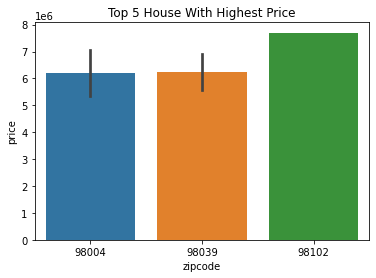

In [26]:
sns.barplot(data=top5_rumah, x='zipcode', y='price')
plt.title('Top 5 House With Highest Price')
plt.show()

In [27]:
grade = data.loc[data['price'] > rata2_price][['zipcode','grade']]
top5_grade = grade.nsmallest(5,['grade'])
top5_grade

,zipcode,grade
36,98052,5
700,98106,5
8050,98042,5
14085,98116,5
15006,98103,5


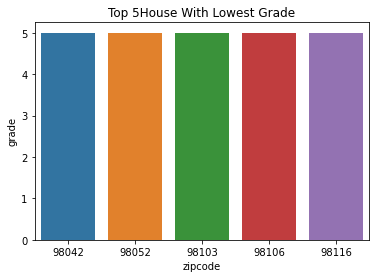

In [30]:
sns.barplot(data=top5_grade, x='zipcode', y='grade')
plt.title('Top 5House With Lowest Grade')
plt.show()

In [31]:
price_by_yearBuilt = data.groupby('yr_built')['price'].mean()

print(price_by_yearBuilt)

yr_built
1900    581536.632184
1901    557108.344828
1902    673192.592593
1903    480958.195652
1904    583867.755556
            ...      
2011    544648.384615
2012    527436.982353
2013    678599.582090
2014    683792.685152
2015    759970.947368
Name: price, Length: 116, dtype: float64


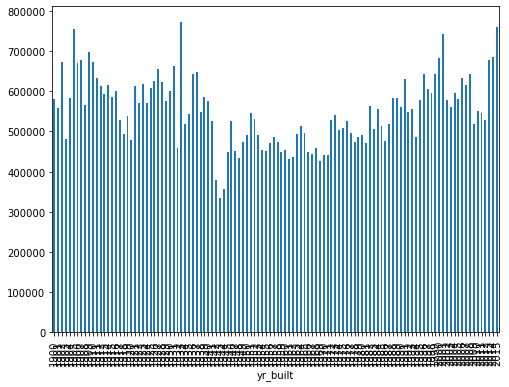

In [39]:
plt.figure(figsize=(8,6))

price_by_yearBuilt.plot.bar()